<a href="https://colab.research.google.com/github/rladbstj56/2024_PythonDataAnalysis/blob/main/241126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display
game = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/play_tennis.csv')
display(game.head(14))
print(game.info())

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes
None


In [22]:
lb = LabelEncoder()
game['day']= lb.fit_transform(game['day'])
game['outlook']= lb.fit_transform(game['outlook'])
print(lb.classes_)
game['temp']= lb.fit_transform(game['temp'])
print(lb.classes_)
game['humidity']= lb.fit_transform(game['humidity'])
print(lb.classes_)
game['wind']= lb.fit_transform(game['wind'])
print(lb.classes_)
game['play']= lb.fit_transform(game['play'])
print(game.info())
print(game.head())
display(game)

['Overcast' 'Rain' 'Sunny']
['Cool' 'Hot' 'Mild']
['High' 'Normal']
['Strong' 'Weak']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   day       14 non-null     int64
 1   outlook   14 non-null     int64
 2   temp      14 non-null     int64
 3   humidity  14 non-null     int64
 4   wind      14 non-null     int64
 5   play      14 non-null     int64
dtypes: int64(6)
memory usage: 800.0 bytes
None
   day  outlook  temp  humidity  wind  play
0    0        2     1         0     1     0
1    6        2     1         0     0     0
2    7        0     1         0     1     1
3    8        1     2         0     1     1
4    9        1     0         1     1     1


,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


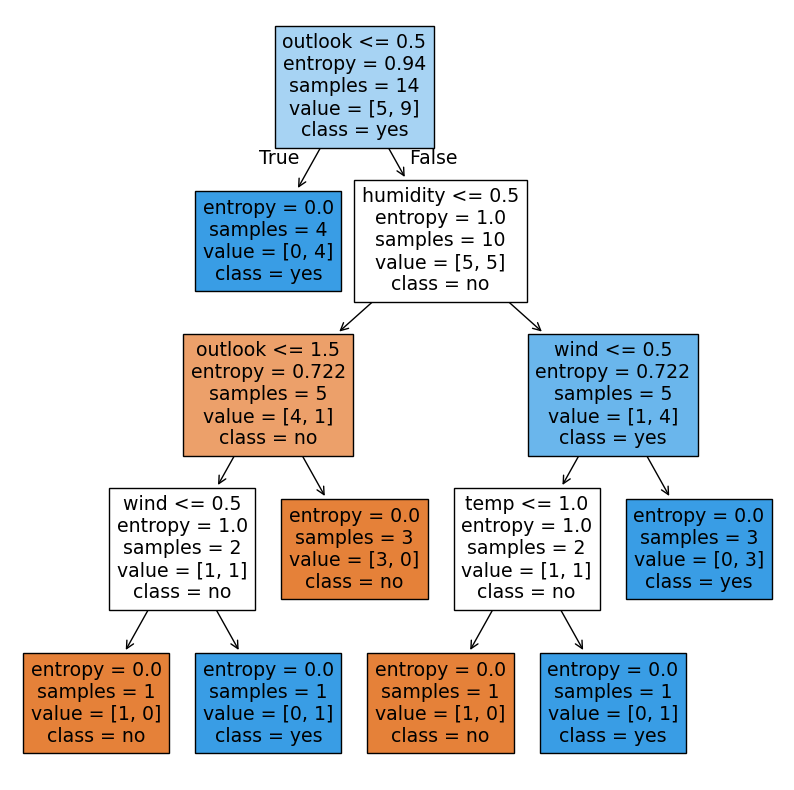

['outlook', 'temp', 'humidity', 'wind']
[0.36262858 0.15192947 0.21123658 0.27420537]


In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
x = game.drop(labels=['day', 'play'], axis=1, inplace=False)
y = game['play']
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(x, y)
plt.figure(figsize=(10,10))
features = ['outlook', 'temp', 'humidity', 'wind']
plot_tree(model, filled=True, feature_names=features, class_names=['no','yes'])
plt.show()
print(features)
print(model.feature_importances_)

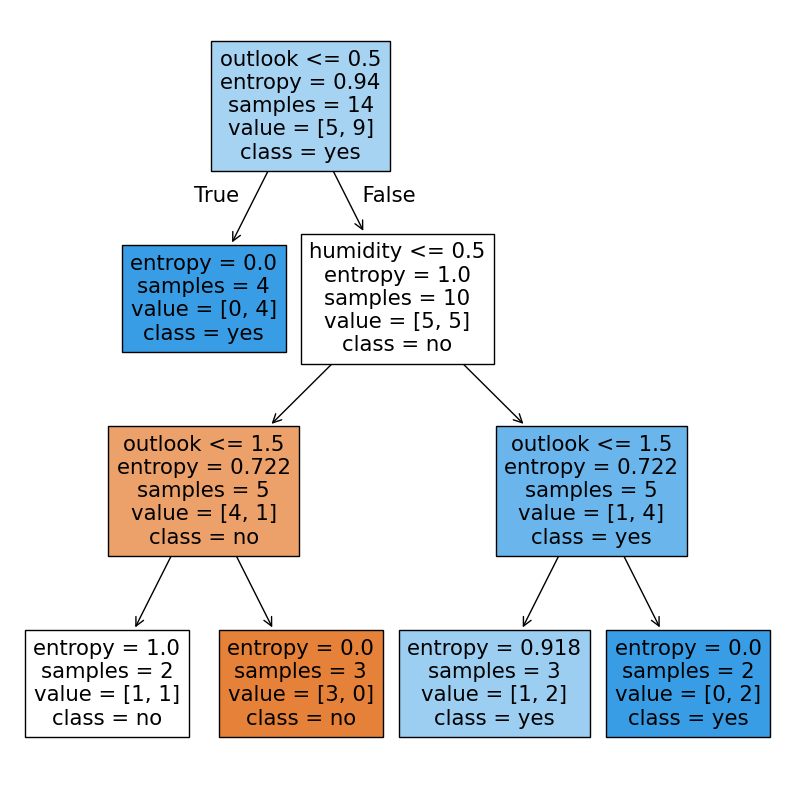

['outlook', 'humidity']
[0.66932088 0.33067912]


In [24]:
# x = game.drop(labels=['day','temp','wind','play'], axis=1, inplace=False)
x = game[['outlook', 'humidity']]
y = game['play']
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(x, y)
plt.figure(figsize=(10,10))
features = ['outlook','humidity']
plot_tree(model, filled=True, feature_names=features, class_names=['no','yes'])
plt.show()
print(features)
print(model.feature_importances_)

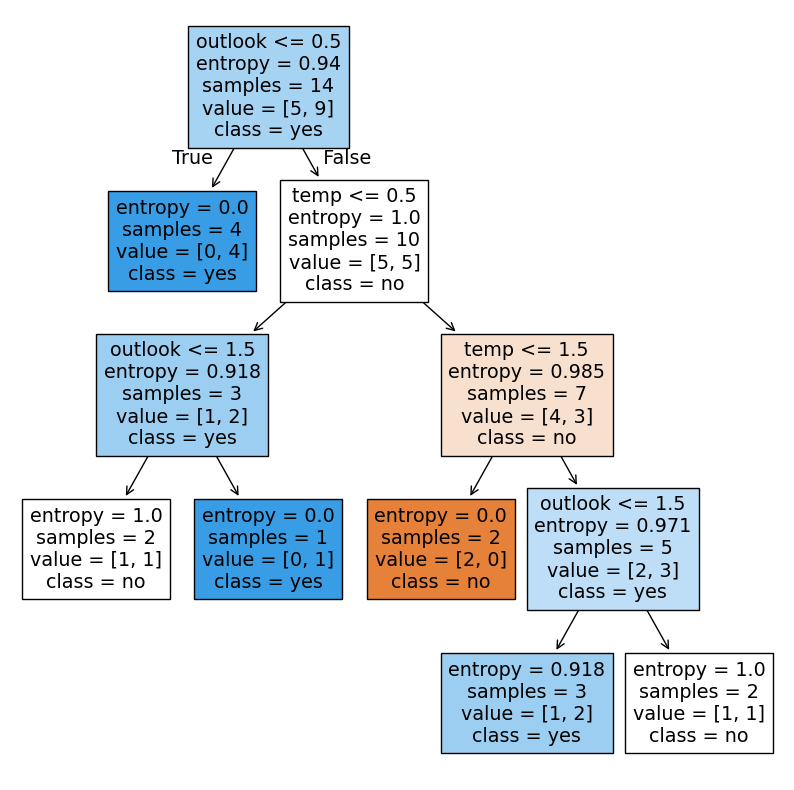

['outlook', 'temp']
[0.62703756 0.37296244]


In [25]:
# x = game.drop(labels=['day','humidity','wind','play'], axis=1, inplace=False)
x = game[['outlook','temp']]
y = game['play']
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(x, y)
plt.figure(figsize=(10,10))
features = ['outlook','temp']
plot_tree(model, filled=True, feature_names=features, class_names=['no','yes'])
plt.show()
print(features)
print(model.feature_importances_)

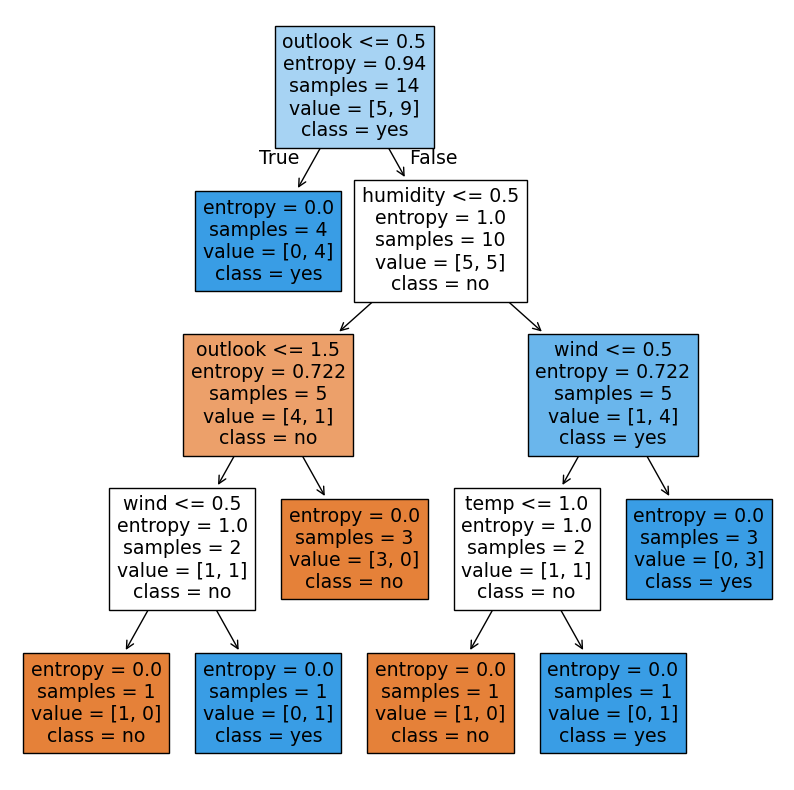

['outlook', 'temp', 'humidity', 'wind']
[0.36262858 0.15192947 0.21123658 0.27420537]


In [26]:
x = game.drop(labels=['day', 'play'], axis=1, inplace=False)
y = game['play']
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(x, y)
plt.figure(figsize=(10,10))
features = ['outlook', 'temp', 'humidity', 'wind']
plot_tree(model, filled=True, feature_names=features, class_names=['no','yes'])
plt.show()
print(features)
print(model.feature_importances_)

In [27]:
print(model.predict([[1,1,1,1]]))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
